In [15]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('../data/churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [18]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [19]:
# Convert TotalCharges to numeric (coerce errors to NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill or drop missing TotalCharges if any
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [20]:
df['TotalCharges'].isnull().value_counts()

TotalCharges
False    7043
Name: count, dtype: int64

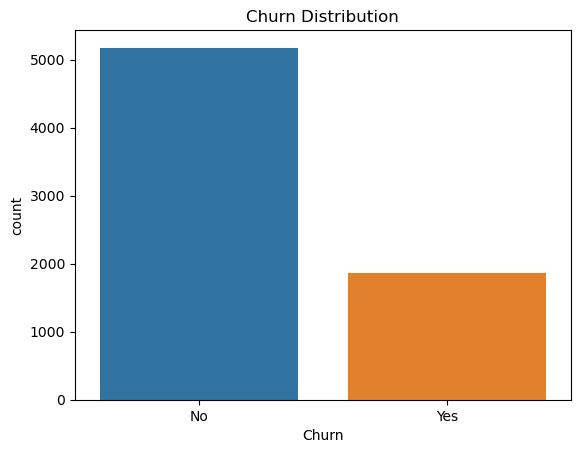

In [21]:
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

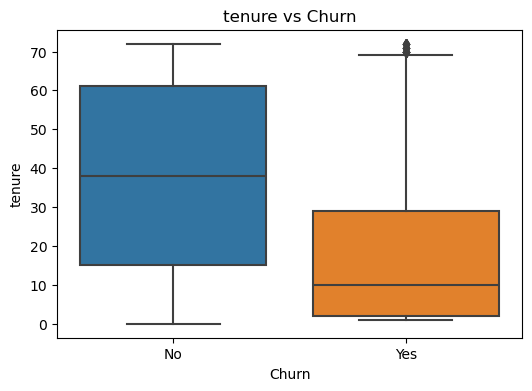

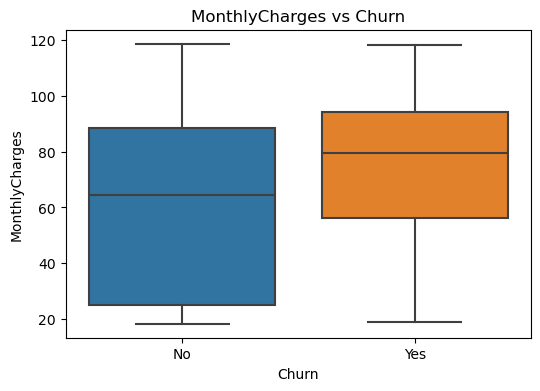

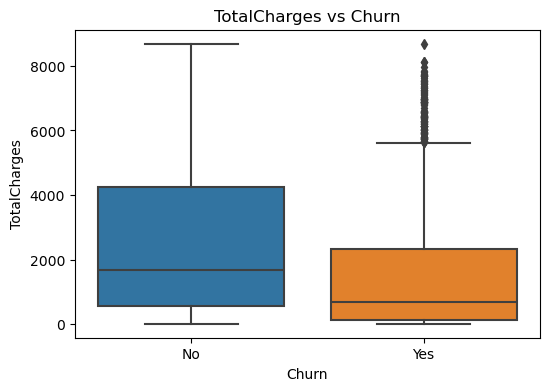

In [22]:
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} vs Churn')
    plt.show()


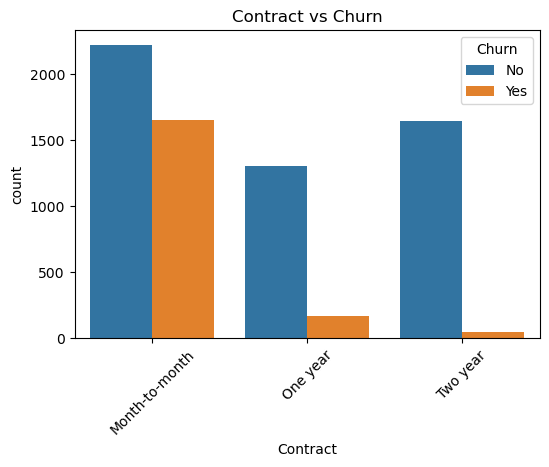

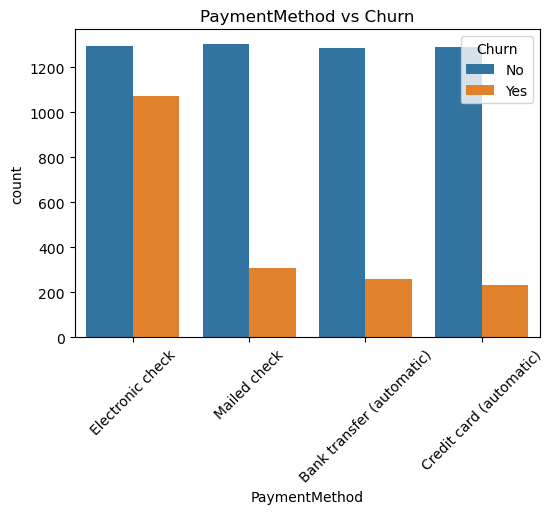

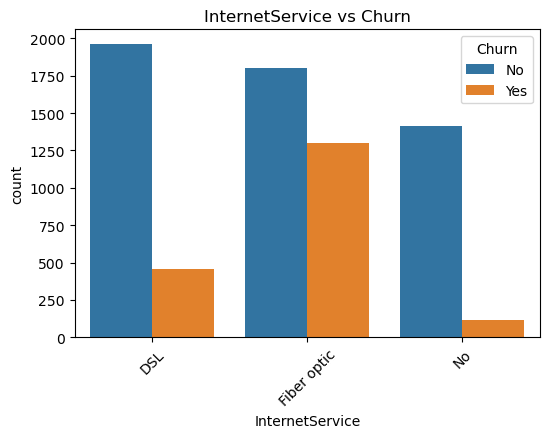

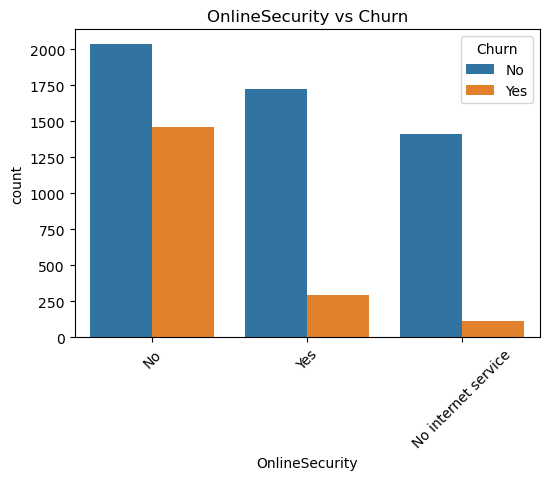

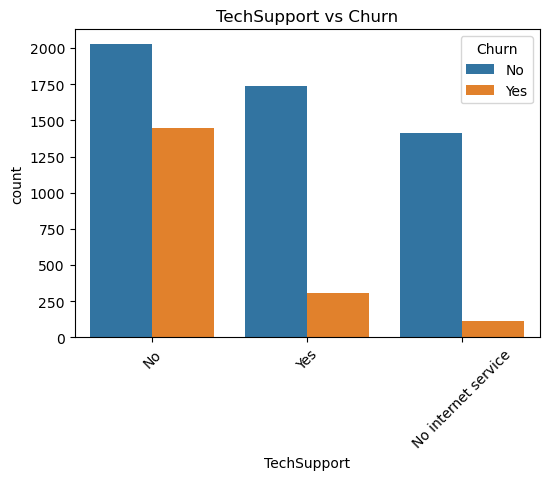

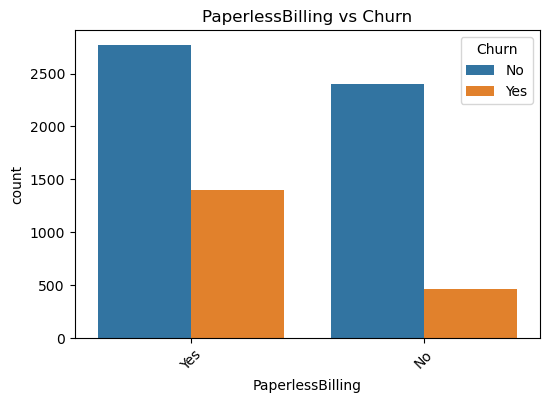

In [23]:
categorical_features = ['Contract', 'PaymentMethod', 'InternetService', 
                        'OnlineSecurity', 'TechSupport', 'PaperlessBilling']

for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
    plt.show()


In [24]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df['Churn'].info()



<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: Churn
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB


In [28]:
# Select categorical features
cat_features = df.select_dtypes(include='object').columns.drop(['customerID'])

# One-hot encode categorical features
df_encoded = pd.get_dummies(df[cat_features], drop_first=True)

# Combine numeric features with encoded categorical features
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.drop('Churn')
df_corr = pd.concat([df[numeric_features], df_encoded, df['Churn']], axis=1)


KeyError: "['Churn'] not found in axis"

In [ ]:
# Correlation with Churn
churn_corr = df_corr.corr()['Churn_numeric'].sort_values(ascending=False)
print(churn_corr)


Churn_numeric                            1.000000
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
MonthlyCharges                           0.193356
PaperlessBilling_Yes                     0.191825
SeniorCitizen                            0.150889
StreamingTV_Yes                          0.063228
StreamingMovies_Yes                      0.061382
MultipleLines_Yes                        0.040102
PhoneService_Yes                         0.011942
gender_Male                             -0.008612
MultipleLines_No phone service          -0.011942
DeviceProtection_Yes                    -0.066160
OnlineBackup_Yes                        -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner_Yes                             -0.150448
Dependents_Yes                          -0.164221
TechSupport_Yes                         -0.164674
OnlineSecurity_Yes                      -0.171226


In [ ]:
from sklearn.model_selection import train_test_split

# Drop customerID and Churn (we’ll use Churn_numeric as target)
X = df_corr.drop(['Churn_numeric'], axis=1)
y = df_corr['Churn_numeric']

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize model
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Train
lr_model.fit(X_train, y_train)

# Predict
y_pred = lr_model.predict(X_test)
y_probs = lr_model.predict_proba(X_test)[:,1]

# Evaluate
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_probs))


Logistic Regression Metrics:
Accuracy: 0.7388218594748048
Precision: 0.5051369863013698
Recall: 0.7887700534759359
F1-score: 0.615866388308977
ROC-AUC: 0.8420134852359917


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Correlation with churn
corr_threshold = 0.1
top_features = churn_corr[abs(churn_corr) > corr_threshold].drop('Churn_numeric').index.tolist()
print("Selected features:", top_features)


Selected features: ['InternetService_Fiber optic', 'PaymentMethod_Electronic check', 'MonthlyCharges', 'PaperlessBilling_Yes', 'SeniorCitizen', 'PaymentMethod_Credit card (automatic)', 'Partner_Yes', 'Dependents_Yes', 'TechSupport_Yes', 'OnlineSecurity_Yes', 'Contract_One year', 'TotalCharges', 'DeviceProtection_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service', 'OnlineBackup_No internet service', 'OnlineSecurity_No internet service', 'InternetService_No', 'TechSupport_No internet service', 'Contract_Two year', 'tenure']


In [ ]:
X_selected = df_corr[top_features]
y = df_corr['Churn_numeric']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)


In [ ]:
lr_model = LogisticRegression(max_iter=2000, class_weight='balanced', random_state=42)
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
y_probs = lr_model.predict_proba(X_test)[:,1]

# Evaluate
print("Logistic Regression Metrics with Selected Features:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_probs))


Logistic Regression Metrics with Selected Features:
Accuracy: 0.7374024130589071
Precision: 0.5033557046979866
Recall: 0.8021390374331551
F1-score: 0.6185567010309279
ROC-AUC: 0.8395721925133688


# Random Forest

In [ ]:
# Models
from sklearn.ensemble import RandomForestClassifier

# Train-test split & preprocessing
from sklearn.model_selection import train_test_split

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
 
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_probs_rf = rf_model.predict_proba(X_test)[:,1]

# Evaluate
print("Random Forest Metrics with Selected Features:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_probs_rf))


Random Forest Metrics with Selected Features:
Accuracy: 0.78708303761533
Precision: 0.6284722222222222
Recall: 0.4839572192513369
F1-score: 0.5468277945619335
ROC-AUC: 0.8183251956909248


In [ ]:
rf_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(rf_feature_importance)


                                  Feature  Importance
11                           TotalCharges    0.225910
2                          MonthlyCharges    0.198591
20                                 tenure    0.190148
19                      Contract_Two year    0.060361
0             InternetService_Fiber optic    0.049254
1          PaymentMethod_Electronic check    0.041827
10                      Contract_One year    0.030321
9                      OnlineSecurity_Yes    0.028674
8                         TechSupport_Yes    0.024918
3                    PaperlessBilling_Yes    0.024264
6                             Partner_Yes    0.021707
7                          Dependents_Yes    0.019085
4                           SeniorCitizen    0.017366
5   PaymentMethod_Credit card (automatic)    0.015533
14    StreamingMovies_No internet service    0.010072
16     OnlineSecurity_No internet service    0.009761
12   DeviceProtection_No internet service    0.007497
17                     Inter

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Selected features from correlation analysis
X_selected = df_corr[top_features]
y = df_corr['Churn_numeric']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

# Optional: balance training data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


# XGBOOST

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np


In [ ]:
X_selected = df_corr[top_features]
y = df_corr['Churn_numeric']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

# Optional: balance training data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


In [ ]:
xgb_model = XGBClassifier(n_estimators=500,
                          max_depth=5,
                          learning_rate=0.1,
                          subsample=0.8,
                          colsample_bytree=0.8,
                          random_state=42,
                          use_label_encoder=False,
                          eval_metric='logloss')

xgb_model.fit(X_train_res, y_train_res)

# Predict
y_probs = xgb_model.predict_proba(X_test)[:,1]
y_pred = xgb_model.predict(X_test)

# Evaluate
print("XGBoost Metrics (Default Threshold 0.5):")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_probs))


/opt/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:33:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Metrics (Default Threshold 0.5):
Accuracy: 0.7480482611781405
Precision: 0.5219399538106235
Recall: 0.6042780748663101
F1-score: 0.5600991325898389
ROC-AUC: 0.806973830375365


In [ ]:
best_f1 = 0
best_threshold = 0.5

for threshold in np.arange(0.3, 0.6, 0.01):
    y_pred_thresh = (y_probs >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_thresh)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print("Best Threshold:", best_threshold)
print("Best F1-score:", best_f1)

# Apply best threshold
y_pred_best = (y_probs >= best_threshold).astype(int)

# Metrics at best threshold
print("Metrics at Best Threshold:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1-score:", f1_score(y_test, y_pred_best))
print("ROC-AUC:", roc_auc_score(y_test, y_probs))


Best Threshold: 0.36000000000000004
Best F1-score: 0.589247311827957
Metrics at Best Threshold:
Accuracy: 0.7288857345635202
Precision: 0.49280575539568344
Recall: 0.732620320855615
F1-score: 0.589247311827957
ROC-AUC: 0.806973830375365
